## Monochrome ART using LSTM
In this notebook, I use a very simple technique to make monochrome (linear) art from images.

<br>Find more at **github.com/josephmulindwa/Simple-Art-using-LSTM/blob/main/art0.ipynb**

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os

from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
import tensorflow.keras as keras

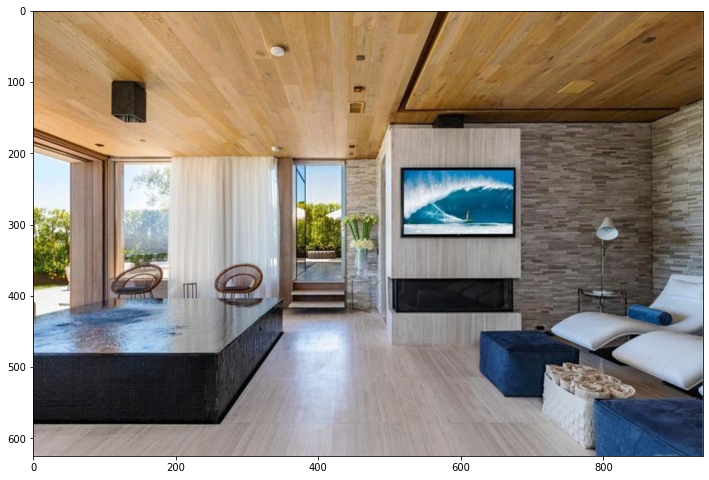

In [2]:
mainpath = "homes"

filenames = [name for name in os.listdir(mainpath) if 'jpg' in name.lower() or 'jpeg' in name.lower() or 'png' in name.lower()]
imcolors = [] # list of images

C = 3
for name in filenames:
    image = cv.imread(os.path.join(mainpath, name), 1)
    if len(image.shape) == C:
        imcolors.append(image)

plt.figure(figsize=(12, 12))
plt.imshow(image[:, :, ::-1], cmap='gray')
plt.show()

In the cell below, I use `step_size` to define the length of the sequence from which the LSTM learns. <br> In the same cell, I extract contiguous patterns of `step_size + 1` pixels each. Later on, I split these patterns into the X(sequences) and y (patterns) which are then used to train the model.

In [3]:
step_size = 50

X = []
for image in imcolors:
    pixels = image.reshape((-1, C)).astype(np.float32) / 255.0
    X += [pixels[i:i+step_size+1] for i in range(len(pixels) - step_size)]
    break # removable line of code
X = np.array(X)
X.shape

(587450, 51, 3)

In [4]:
X_full, y_full = X[:, :-1], X[:, -1]

In [5]:
y_full.shape, X_full.shape

((587450, 3), (587450, 50, 3))

In [6]:
name = "lstm_s50_0040.h5"

model = None
if name not in os.listdir("."):
    model = Sequential()
    model.add(LSTM(100, return_sequences=True, input_shape=(step_size, C)))
    model.add(LSTM(200, return_sequences=True))
    model.add(LSTM(100, return_sequences=False))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(3, activation=None))
    model.compile(optimizer='adam', loss='mean_squared_error')
    print('Model created...')
    history = model.fit(X_full, y_full, epochs=1, batch_size=64)
    model.save(name)
else:
    model = keras.models.load_model(name)
    print('Model loaded...')

Model loaded...


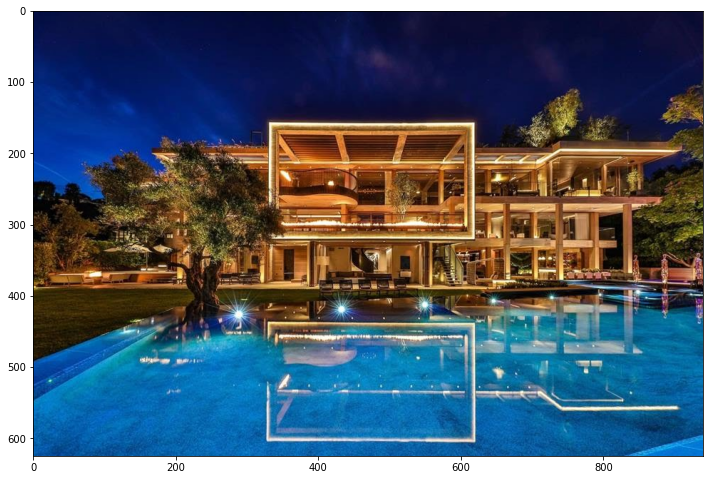

In [7]:
k = 0
imagex = imcolors[k]

plt.figure(figsize=(12, 12))
plt.imshow(imagex[:, :, ::-1], cmap='gray')
plt.show()

In [8]:
# split image into sequences
xpixels = imagex.reshape((-1, C)).astype(np.float32) / 255.0
xp = [xpixels[i:i+step_size+1] for i in range(len(xpixels) - step_size)]
xp = np.array(xp)

x_, y_ = xp[:, :-1], xp[:, -1] 

In [10]:
# Warning; this cell is slow
preds = model.predict(x_, workers=4, use_multiprocessing=True)

In [11]:
preds.shape

(587450, 3)

In [12]:
out = list(xpixels[:50]) + list(preds)
print('out :', len(out))
out = (np.array(out, dtype=np.float32) * 255).astype(np.uint8)

out : 587500


**Below** is an image generated by the predicting one pixel ahead at a time.

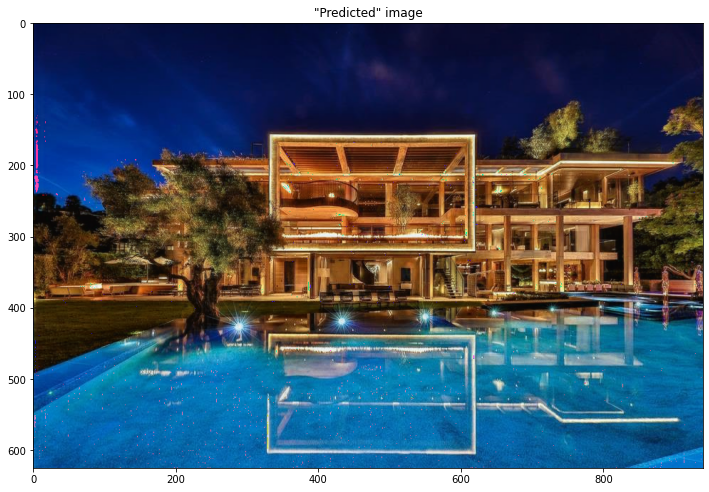

In [14]:
imout = out.reshape(imcolors[k].shape)

plt.figure(figsize=(12, 12))
plt.imshow(imout[:, :, ::-1])
plt.title('"Predicted" image')
plt.show()

### Plotting a new image to test the art

(625, 940, 3)


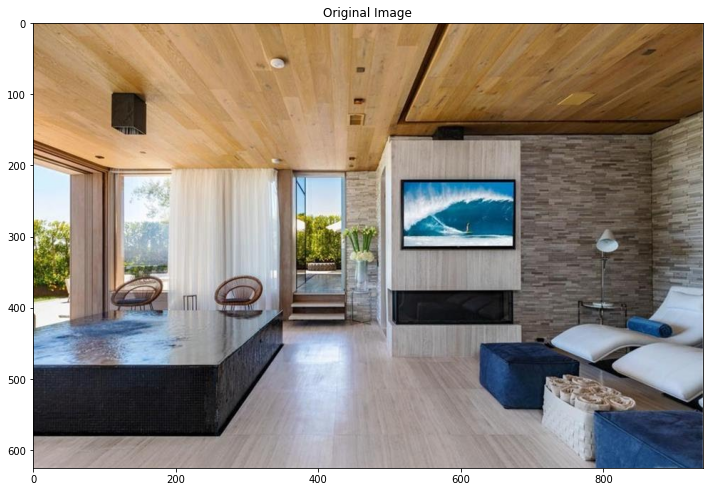

In [16]:
k = -1
imagex = imcolors[k]

H, W, C = imagex.shape
step_size = 50

print(imagex.shape)
plt.figure(figsize=(12, 12))
plt.imshow(imagex[:, :, ::-1], cmap='gray')
plt.title("Original Image")
plt.show()

In [17]:
xpixels = imagex.reshape((-1, C)).astype(np.float32) / 255.0
xp = [xpixels[i:i+step_size+1] for i in range(len(xpixels) - step_size)]
xp = np.array(xp)
x_, y_ = xp[:, :-1], xp[:, -1] 

In [18]:
preds_ = model.predict(x_, workers=4, use_multiprocessing=True)

In [19]:
preds_.shape

(587450, 3)

In [20]:
out_ = list(xpixels[:50]) + list(preds_)
print('out :', len(out_))
out_ = (np.array(out_, dtype=np.float32) * 255).astype(np.uint8)

out : 587500


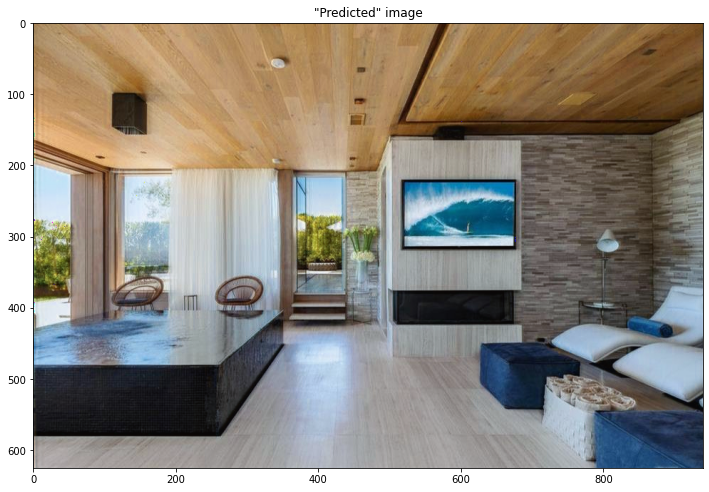

In [22]:
imout_ = out_.reshape(imagex.shape)

plt.figure(figsize=(12, 12))
plt.imshow(imout_[:, :, ::-1])
plt.title('"Predicted" image')
plt.show()

In [23]:
imagex_gray = cv.cvtColor(imagex, cv.COLOR_BGR2GRAY)
imout_gray = cv.cvtColor(imout_, cv.COLOR_BGR2GRAY)

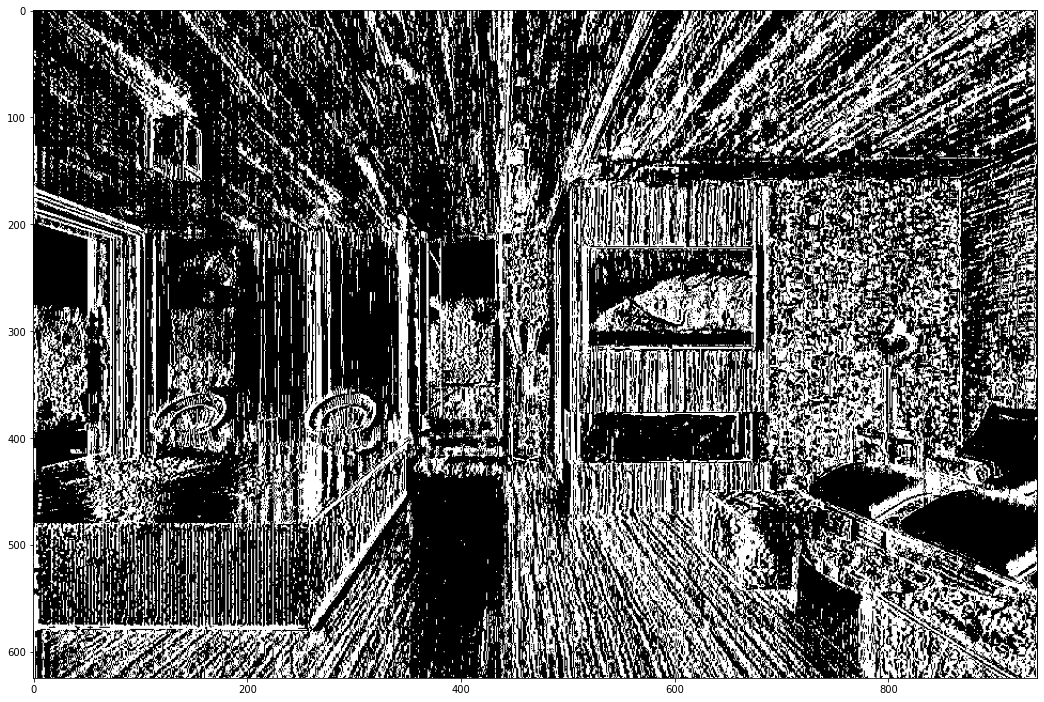

In [24]:
dimg = np.abs(imagex_gray - imout_gray)
thresh = 160
less_indexer = dimg < thresh
high_indexer = dimg >= thresh

dimg[less_indexer] = 0
dimg[high_indexer] = 255
    
plt.figure(figsize=(18, 18))
plt.imshow(dimg, cmap='gray')
plt.show()

(625, 940, 3)


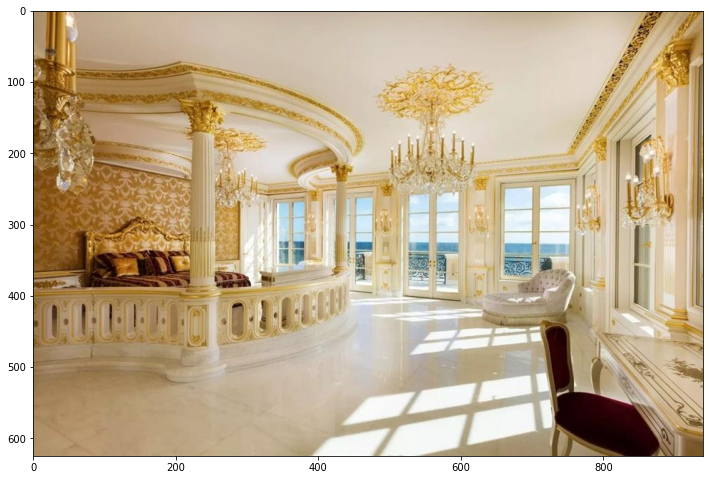

In [26]:
k = 1

imagex = imcolors[k]

H, W, C = imagex.shape
step_size = 50

print(imagex.shape)
plt.figure(figsize=(12, 12))
plt.imshow(imagex[:, :, ::-1], cmap='gray')
plt.show()

In [27]:
xpixels = imagex.reshape((-1, C)).astype(np.float32) / 255.0
xp = [xpixels[i:i+step_size+1] for i in range(len(xpixels) - step_size)]
xp = np.array(xp)
x_, y_ = xp[:, :-1], xp[:, -1] 

In [28]:
preds_ = model.predict(x_, workers=4, use_multiprocessing=True)

In [29]:
out_ = list(xpixels[:50]) + list(preds_)
print('out :', len(out_))
out_ = (np.array(out_, dtype=np.float32) * 255).astype(np.uint8)

out : 587500


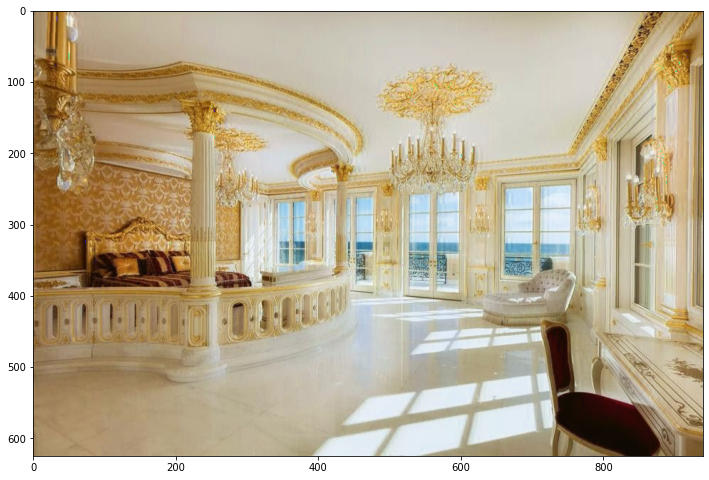

In [30]:
imout_ = out_.reshape(imagex.shape)

plt.figure(figsize=(12, 12))
plt.imshow(imout_[:, :, ::-1])
plt.show()

In [31]:
imagex_gray = cv.cvtColor(imagex, cv.COLOR_BGR2GRAY)
imout_gray = cv.cvtColor(imout_, cv.COLOR_BGR2GRAY)

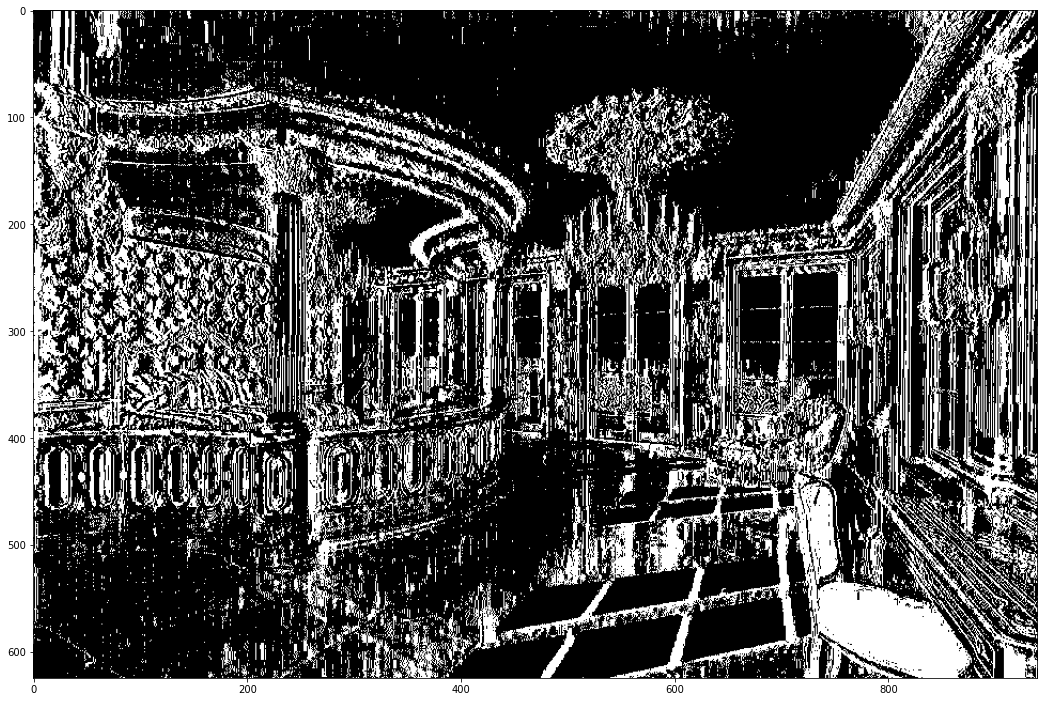

In [33]:
dimg = np.abs(imagex_gray - imout_gray)

thresh = 180
less_indexer = dimg < thresh
high_indexer = dimg >= thresh

dimg[less_indexer] = 0
dimg[high_indexer] = 255
    
plt.figure(figsize=(18, 18))
plt.imshow(dimg, cmap='gray')
plt.show()